## N-grams from Jurafsky

In [1]:
import pandas as pd
import numpy as np
import re
from collections import Counter
import statistics

In [2]:
df = pd.read_csv('./data_TM2/processed_utterances_sentence_DA_labeling.csv', index_col=0)

In [3]:
####### correct format of column that was string and should be list

import ast

print(type(df['all_DA'][0]))
all_DA = []
for row in range(len(df['all_DA'])):
    inst = ast.literal_eval(df['all_DA'][row])
    inst = [i.strip("[]") for i in inst]
    all_DA.append(inst)
    
df['all_DA'] = all_DA

print(type(df['all_DA'][0]))

<class 'str'>
<class 'list'>


In [4]:
df.drop(df.iloc[:, 8:-1], inplace = True, axis = 1)
df = df.explode('all_DA')
df['all_DA'] = df['all_DA'].fillna('<UNK>')
df['all_DA'].head()

0          U_greeting
1               <UNK>
2          A_greeting
2    A_detail_request
3      A_confirmation
Name: all_DA, dtype: object

In [5]:
#solution for all dialogues. After This data will be prepared to serve as input

unique_ids = df['conversation_id'].unique()

start = '<s>'
start_dou = '<ss>'
end_dou = '<ee>'
end ='<e>'
full_DA = []  

for dialog in unique_ids:
    dialog_DA = []   
    temp = df.loc[df['conversation_id'] == dialog]
    for x in range(len(temp)):
        dialog_DA.append(temp['all_DA'].iloc[x])

    #insert begin and end tokens for each dialog. This is for bigram only. for tri would need two symbols in the begin and 2 in the end
    dialog_DA.insert(0, start)
    dialog_DA.insert(1, start_dou)
    dialog_DA.append(end_dou)
    dialog_DA.append(end)
    full_DA.append(dialog_DA)

full_DA[0]


# #solution for all dialogues. After This data will be prepared to serve as input

# unique_ids = df['conversation_id'].unique()

# start = '<s>'
# start_dou = '<ss>'
# end_dou = '<ee>'
# end ='<e>'
# full_DA = []  
# full_new_text = [] #### NEW ####

# for dialog in unique_ids:
#     dialog_DA = []
#     dialog_new_text = []  #### NEW ####
#     temp = df.loc[df['conversation_id'] == dialog]
    
#     for x in range(len(temp)):
#         dialog_DA.append(temp['all_DA'].iloc[x])
#         dialog_new_text.append(temp['new_text'].iloc[x]) #### NEW ####
        
#         full_DA.append(dialog_DA)
#         full_new_text.append(dialog_new_text)  #### NEW ####

#     #insert begin and end tokens for each dialog. This is for bigram only. for tri would need two symbols in the begin and 2 in the end
#     dialog_DA.insert(0, start)
#     dialog_DA.insert(1, start_dou)
#     dialog_DA.append(end_dou)
#     dialog_DA.append(end)
#     full_DA.append(dialog_DA)
    
#     dialog_new_text.insert(0, start) #### NEW ####
#     dialog_new_text.insert(1, start_dou) #### NEW ####
#     dialog_new_text.append(end_dou) #### NEW ####
#     dialog_new_text.append(end) #### NEW ####
#     full_new_text.append(dialog_new_text) #### NEW ####

# print(full_DA[0])
# print(full_new_text[0]) #### NEW ####
# print(len(full_DA[10]) == len(full_new_text[10]))

['<s>',
 '<ss>',
 'U_greeting',
 '<UNK>',
 'A_greeting',
 'A_detail_request',
 'A_confirmation',
 'U_greeting',
 '<UNK>',
 'A_detail_request',
 'A_greeting',
 'A_detail_request',
 'U_answer',
 '<UNK>',
 '<UNK>',
 '<UNK>',
 'A_confirmation',
 'A_detail_request',
 'A_confirmation',
 'A_sequence_closer',
 '<UNK>',
 '<UNK>',
 '<UNK>',
 '<UNK>',
 'A_request_summary',
 'A_confirmation',
 'A_sequence_closer',
 'U_confirmation',
 'A_confirmation',
 'A_sequence_closer',
 '<UNK>',
 'A_sequence_closer',
 '<UNK>',
 'U_partial_request',
 'A_detail_request',
 'A_grant',
 'U_answer',
 'A_confirmation',
 'A_sequence_closer',
 '<UNK>',
 '<UNK>',
 '<UNK>',
 'A_confirmation',
 'A_sequence_closer',
 'U_sequence_closer',
 'U_sequence_closer',
 'A_confirmation',
 'A_sequence_closer',
 'A_sequence_closer',
 '<UNK>',
 'U_greeting',
 'U_sequence_closer',
 '<ee>',
 '<e>']

In [6]:
#flatten nested lists

def flatten(t):
    # https://stackoverflow.com/questions/952914/how-to-make-a-flat-list-out-of-a-list-of-lists
    return [item for sublist in t for item in sublist]

# df['labels_UNK_and_SINGLE_DA'] = flatten(ALL_DA)

In [7]:
#modeling phase
#from this tutorial: https://medium.com/swlh/language-modelling-with-nltk-20eac7e70853#b9bf

import nltk
from nltk.util import ngrams
# from nltk import word_tokenize

unigram=[]
bigram=[]
trigram=[]
fourgram=[]
tokenized_text = flatten(unigram)

#unigram, bigram, trigram, and fourgram models are created
for sequence in full_DA:
    unigram.append(sequence)

bigram.extend(list(ngrams(sequence, 2)))  
trigram.extend(list(ngrams(sequence, 3)))
fourgram.extend(list(ngrams(sequence, 4)))

freq_uni = Counter(flatten(unigram))
freq_bi = nltk.FreqDist(bigram)
freq_tri = nltk.FreqDist(trigram)
freq_four = nltk.FreqDist(fourgram)


print("Most common n-grams without add-1 smoothing: \n")
print ("Most common unigrams: \n", freq_uni.most_common(5))
print ("Most common bigrams: \n", freq_bi.most_common(5))
print ("\nMost common trigrams: \n", freq_tri.most_common(5))
print ("\nMost common fourgrams: \n", freq_four.most_common(5))

Most common n-grams without add-1 smoothing: 

Most common unigrams: 
 [('<UNK>', 88216), ('A_detail_request', 63851), ('U_answer', 57676), ('U_sequence_closer', 57516), ('A_greeting', 53345)]
Most common bigrams: 
 [(('U_confirmation', 'U_sequence_closer'), 6), (('U_partial_request', 'A_grant'), 3), (('U_greeting', 'U_confirmation'), 3), (('U_sequence_closer', 'U_partial_request'), 3), (('A_grant', 'U_confirmation'), 2)]

Most common trigrams: 
 [(('U_greeting', 'U_confirmation', 'U_sequence_closer'), 3), (('U_confirmation', 'U_sequence_closer', 'U_partial_request'), 3), (('A_grant', 'U_confirmation', 'U_sequence_closer'), 2), (('U_sequence_closer', 'U_partial_request', 'A_grant'), 2), (('<s>', '<ss>', 'A_greeting'), 1)]

Most common fourgrams: 
 [(('U_greeting', 'U_confirmation', 'U_sequence_closer', 'U_partial_request'), 3), (('U_confirmation', 'U_sequence_closer', 'U_partial_request', 'A_grant'), 2), (('<s>', '<ss>', 'A_greeting', 'A_detail_request'), 1), (('<ss>', 'A_greeting', 'A

In [8]:
# bigram

In [9]:
#Add-1 smoothing is performed here. Different value might be better
            
ngrams_all = {1:[], 2:[], 3:[], 4:[]} #from unigram to fourgram in this case
for i in range(4):
    for each in unigram:
        for j in ngrams(each, i+1):
            ngrams_all[i+1].append(j);
ngrams_voc = {1:set([]), 2:set([]), 3:set([]), 4:set([])} #set() method is used to convert any of the iterable to sequence of iterable elements with distinct elements

for i in range(4):
    for gram in ngrams_all[i+1]:
        if gram not in ngrams_voc[i+1]:
            ngrams_voc[i+1].add(gram)
total_ngrams = {1:-1, 2:-1, 3:-1, 4:-1}
total_voc = {1:-1, 2:-1, 3:-1, 4:-1}

for i in range(4):
    total_ngrams[i+1] = len(ngrams_all[i+1])
    total_voc[i+1] = len(ngrams_voc[i+1])                       
    
ngrams_prob = {1:[], 2:[], 3:[], 4:[]}

for i in range(4):
    for ngram in ngrams_voc[i+1]:
        tlist = [ngram]
        tlist.append(ngrams_all[i+1].count(ngram))
        ngrams_prob[i+1].append(tlist)
    
for i in range(4):
    for ngram in ngrams_prob[i+1]:
        ngram[-1] = (ngram[-1])/(total_ngrams[i+1]+total_voc[i+1])             


In [10]:
#Prints top 10 unigram, bigram, trigram, fourgram
print("Most common n-grams without stopword removal and with add-1 smoothing: \n")
for i in range(4):
    ngrams_prob[i+1] = sorted(ngrams_prob[i+1], key = lambda x:x[1], reverse = True)
    
print ("Most common unigrams: ", str(ngrams_prob[1][:10]))
print ("\nMost common bigrams: ", str(ngrams_prob[2][:10]))
print ("\nMost common trigrams: ", str(ngrams_prob[3][:10]))
print ("\nMost common fourgrams: ", str(ngrams_prob[4][:10]))

Most common n-grams without stopword removal and with add-1 smoothing: 

Most common unigrams:  [[('<UNK>',), 0.12918531362028163], [('A_detail_request',), 0.09350470957613814], [('U_answer',), 0.08446191335317135], [('U_sequence_closer',), 0.08422760608261674], [('A_greeting',), 0.07811950842334638], [('A_sequence_closer',), 0.06953361137796106], [('U_confirmation',), 0.06925976475550036], [('A_confirmation',), 0.06890098174746362], [('U_partial_request',), 0.06879847231659598], [('A_grant',), 0.06227155041120926]]

Most common bigrams:  [[('A_confirmation', 'A_sequence_closer'), 0.042966175117006435], [('A_detail_request', 'U_answer'), 0.04189408533774582], [('<UNK>', '<UNK>'), 0.04128897023824718], [('U_confirmation', 'U_sequence_closer'), 0.04007123240774247], [('U_partial_request', 'A_grant'), 0.028276743309574182], [('A_greeting', 'A_detail_request'), 0.026013943173235594], [('<ee>', '<e>'), 0.02595988822638212], [('<s>', '<ss>'), 0.02595988822638212], [('U_answer', 'A_confirmati

### To calculate probability of unseen sequences

In [11]:
def ngram_prediction(tokenized_sent):
    ngram = {1:[], 2:[], 3:[]}#to store n-grams formed from the strings

    for i in range(1, 4):
        ngram[i] = list(ngrams(tokenized_sent, i))[-1]
    
    print("String: ", ngram)
    
    for j in range(4):
        ngrams_prob[j+1] = sorted(ngrams_prob[j+1], key = lambda x:x[1], reverse = True)
    
    pred = {1:[], 2:[], 3:[]}
    for k in range(3):
        count = 0
        for each in ngrams_prob[k+2]:
            if each[0][:-1] == ngram[k+1]:#to find predictions based on highest probability of n-grams                   
                count +=1
                pred[k+1].append(each[0][-1])
                if count ==5:
                    break
        if count<5:
            while(count!=5):
                pred[k+1].append("NA")#if no word prediction is found, replace with NOT FOUND
                count +=1
                
    return pred, ngrams_prob

token_1 = ['<s>','U_greeting','<UNK>','A_greeting','A_confirmation']
token_2 = ['<s>','U_greeting','A_greeting']
pred_1, ngrams_prob_1 = ngram_prediction(token_1)
pred_2, ngrams_prob_2 = ngram_prediction(token_2)
    

String:  {1: ('A_confirmation',), 2: ('A_greeting', 'A_confirmation'), 3: ('<UNK>', 'A_greeting', 'A_confirmation')}
String:  {1: ('A_greeting',), 2: ('U_greeting', 'A_greeting'), 3: ('<s>', 'U_greeting', 'A_greeting')}


In [12]:
print("Next word predictions for the strings using the probability models of bigrams, trigrams, and fourgrams\n")
print("String 1 \n")
print("Bigram model predictions: {}\nTrigram model predictions: {}\nFourgram model predictions: {}\n" .format(pred_1[1], pred_1[2], pred_1[3]))
print("String 2 \n")
print("Bigram model predictions: {}\nTrigram model predictions: {}\nFourgram model predictions: {}" .format(pred_2[1], pred_2[2], pred_2[3]))

Next word predictions for the strings using the probability models of bigrams, trigrams, and fourgrams

String 1 

Bigram model predictions: ['A_sequence_closer', 'A_grant', 'A_detail_request', '<UNK>', 'U_confirmation']
Trigram model predictions: ['A_sequence_closer', 'A_grant', 'A_detail_request', 'A_completion_check', '<UNK>']
Fourgram model predictions: ['A_sequence_closer', 'A_detail_request', 'A_completion_check', '<UNK>', 'U_confirmation']

String 2 

Bigram model predictions: ['A_detail_request', 'A_grant', 'A_confirmation', 'A_greeting', 'A_completion_check']
Trigram model predictions: ['A_detail_request', 'A_confirmation', 'A_greeting', '<UNK>', 'U_greeting']
Fourgram model predictions: ['NA', 'NA', 'NA', 'NA', 'NA']


In [13]:
#Dict of probabilities from unigram to fourgram

# ngrams_prob

### Perplexity
An intrinsic evaluation metric is one that measures the quality of a model independent of any application.

The perplexity of a language model on a test set is the inverse probability of the test set, normalized by the number of words. Thus the higher the conditional probability of the word sequence, the lower the perplexity, and maximizing the perplexity is equivalent to maximizing the test set probability according to the language model.

https://stackoverflow.com/questions/54941966/how-can-i-calculate-perplexity-using-nltk/55043954#55043954?newreg=b97aa34187184c90988f9a75e51898c2

##### Here we calculate perprexity in the whole dataset. without train, dev, test. Why though??  
Maybe because it's unsupervised??
i've read about v/k folding. also seems to need x and y

In [14]:
print(len(unigram))

17289


In [15]:
import nltk
from nltk.lm.preprocessing import padded_everygram_pipeline
from nltk.lm import MLE
from nltk.lm import Vocabulary

unigram_train = unigram[0:17000]

n = 2
train_data = [nltk.bigrams(t,  pad_right=True, pad_left=True, left_pad_symbol="<s>", right_pad_symbol="<e>") for t in unigram_train]
words = [word for sent in unigram_train for word in sent]
words.extend(["<s>", "<e>"])
padded_vocab = Vocabulary(words)
model = MLE(n)
model.fit(train_data, padded_vocab)

unigram_test = unigram[17000:] # if you want to test just small sample
print(len(unigram_test))

test_data = [nltk.bigrams(t,  pad_right=True, pad_left=True, left_pad_symbol="<s>", right_pad_symbol="<e>") for t in unigram_test]

#for each bigram MLE estimate (tuples estimate)
#maximizing a likelihood function so that, under the assumed statistical model, the observed data is most probable.
#if you don't want to see MLE per tuple comment print line

for test in test_data:
#     print ("MLE Estimates:", [((ngram[-1], ngram[:-1]),model.score(ngram[-1], ngram[:-1])) for ngram in test]) # will generate one estimator per input. Here each input contains all DA labels for one dialog sequence.
    pass

#for whole dialog perplexity calculation.
#if print unigram_test[i] you see sentence and perplexity. 
#to make it easier to read perplexities (not caring about the specific sentence) print second line (only i)

test_data = [nltk.bigrams(t,  pad_right=True, pad_left=True, left_pad_symbol="<s>", right_pad_symbol="<e>") for t in unigram_test]

for i, test in enumerate(test_data):
#     print("PP({0}):{1}".format(unigram_test[i], model.perplexity(test)))
    print("PP({0}):{1}".format(i, model.perplexity(test)))


289
PP(0):4.495144982893566
PP(1):6.326616659124132
PP(2):5.497682392981005
PP(3):5.75324874562967
PP(4):5.412144654668064
PP(5):4.529008613318499
PP(6):4.180794405334284
PP(7):5.2581944340617826
PP(8):5.08739754205226
PP(9):6.011258447507772
PP(10):7.6716667135807075
PP(11):6.089039511106873
PP(12):5.7559805622349955
PP(13):4.246438130101796
PP(14):5.372605240203295
PP(15):3.8863468625452278
PP(16):4.180711472490924
PP(17):5.107190378495074
PP(18):5.995346154355288
PP(19):7.417165309837154
PP(20):4.3063066521824895
PP(21):4.31752606891241
PP(22):5.224650106896126
PP(23):3.9139436007820816
PP(24):4.770950276259043
PP(25):4.646804835196973
PP(26):5.130569452790832
PP(27):5.0718929856778185
PP(28):5.350757978164802
PP(29):5.516711860489342
PP(30):4.792476553398838
PP(31):5.093554370823045
PP(32):5.50690398840427
PP(33):4.486775876468721
PP(34):5.655286798517427
PP(35):4.327048160207561
PP(36):3.5013216630540036
PP(37):5.009321705869809
PP(38):5.462687492048554
PP(39):4.937509135793148
PP

In [16]:
uni = {}
bi = {}
tri = {}
four = {}

######## this alternative version makes some parts of the code not to work for bi,tri,four.

for key, value in ngrams_prob.items():
    for lista in value:
#         lista[0] = str(lista[0])
#         lista[0] = re.sub(r"['(),]", "", lista[0])
        
        if key ==1:
            lista[0] = str(lista[0])
            lista[0] = re.sub(r"['(),]", "", lista[0])
            uni[lista[0]] = lista[1]
        if key ==2:
            bi[lista[0]] = lista[1]
        if key ==3:
            tri[lista[0]] = lista[1]
        if key ==4:
            four[lista[0]] = lista[1]

### Make emission probabilities for hidden state New

- use shift(1) por exemplo
- count +=1 for that combination of 2 labels every time one label is followed by next. 
- I want to calculate for t, the p(t|t+1) for bigrams and p(t|t+1)*p(t+1|t+2)
- format: 
    - bi: {('A_confirmation', 'A_sequence_closer'): 0.042966175117006435,
    - tri: {('U_answer', 'A_confirmation', 'A_sequence_closer'): 0.018695486830967774,

In [17]:
# unique da counting special symbols
da_u = [] #uni.keys()
[da_u.append(k) for k in uni.keys()]

#create shifted DA for future bigram
df['shifted_DA_bi'] = df['all_DA'].shift(-1)

#create shifted DA for future trigram
df['shifted_DA_tri'] = df['all_DA'].shift(-2)
df.head()

,task,conversation_id,instruction_id,index,speaker,text,segments,new_text,all_DA,shifted_DA_bi,shifted_DA_tri
0,flights,dlg-00100680-00e0-40fe-8321-6d81b21bfc4f,flight-12,0,U,Hello. I'd like to find a round trip commercia...,"[{'start_index': 26, 'end_index': 36, 'text': ...",Hello.,U_greeting,<UNK>,A_greeting
1,flights,dlg-00100680-00e0-40fe-8321-6d81b21bfc4f,flight-12,0,U,Hello. I'd like to find a round trip commercia...,"[{'start_index': 26, 'end_index': 36, 'text': ...",I'd like to find a round trip commercial airli...,<UNK>,A_greeting,A_detail_request
2,flights,dlg-00100680-00e0-40fe-8321-6d81b21bfc4f,flight-12,1,A,"Hello, how can I help you?",NaN,"Hello, how can I help you?",A_greeting,A_detail_request,A_confirmation
2,flights,dlg-00100680-00e0-40fe-8321-6d81b21bfc4f,flight-12,1,A,"Hello, how can I help you?",NaN,"Hello, how can I help you?",A_detail_request,A_confirmation,U_greeting
3,flights,dlg-00100680-00e0-40fe-8321-6d81b21bfc4f,flight-12,2,A,"San Francisco to Denver, got it.","[{'start_index': 0, 'end_index': 13, 'text': '...","San Francisco to Denver, got it.",A_confirmation,U_greeting,<UNK>


In [18]:
#count occurrences of each DA

df = df.reset_index(drop=True)
count_DA = df['all_DA'].value_counts().reset_index(name='Counts')
count_DA.iloc[0, 0]
count_da = {}
for e in range(len(count_DA)):
    count_da[count_DA.iloc[e, 0]] = count_DA.iloc[e, 1]

count_da

#create list of all possible unique bigrams and trigrams. order matters

da_tuples = []

for fir in range(len(da_u)):
    for sec in range(len(da_u)):
        da_tuples.append((da_u[fir], da_u[sec]))


da_triples = []

for fir in range(len(da_u)):
    for sec in range(len(da_u)):
        for thir in range(len(da_u)):
            da_triples.append((da_u[fir],da_u[sec], da_u[thir]))


#sanity check bi and tri
print(len(da_tuples) == len(da_u)*len(da_u), len(da_tuples))
print(len(da_triples) == len(da_u)**3, len(da_triples))



#count occurrences for bigrams
bi_next = {}

for row in range(len(df)-1):
    k = (df['all_DA'][row], df['shifted_DA_bi'][row])            
    bi_next[k] = bi_next[k] + 1 if k in bi_next else 1
    
# bi_next

#count occurrences for trigrams
tri_next = {}

for row in range(len(df)-1):
    k = (df['all_DA'][row], df['shifted_DA_bi'][row], df['shifted_DA_tri'][row])            
    tri_next[k] = tri_next[k] + 1 if k in tri_next else 1
    
# tri_next

True 729
True 19683


## Correct past bi/trigrams (including all possible examples, now it has only non zero examples)

In [19]:
# bi_past same as bi, but if there is no match prob will be set to 0.00000000000001 or sth very low
#same has to be done for tri_past and tri

bi_past = {} #use da_tuples list ad basis, since contains all possibilities
tri_past = {} #use da_triples list ad basis, since contains all possibilities
          
for dupla in da_tuples: #list containing all possible tuples of bigram
    bi_past[dupla] = 0.0000000001 
    for k in bi.keys():
        if k == dupla:
            bi_past[dupla] = bi.get(k)
            
for tripla in da_triples: #list containing all possible tuples of bigram
    tri_past[tripla] = 0.0000000001 
    for ka in tri.keys():
        if ka == tripla:
            tri_past[tripla] = tri.get(ka)

#sanity check
print(len(bi_past) == len(da_u)**2, len(bi_past))
print(len(tri_past) == len(da_u)**3, len(tri_past))

True 729
True 19683


## Future bi/trigrams

In [20]:
bi_fut = {}
for A in da_u:
    for B in da_u:
        bi_fut[(A,B)] = bi_past.get((A,B))*uni.get(A)/uni.get(B)
        
tri_fut = {}
for e, A in enumerate(da_u):
    for f, B in enumerate(da_u):
        for g, C in enumerate(da_u):
            tri_fut[(A,B,C)] = tri_past.get((A,B,C))*bi_past.get((A,C))/bi_past.get((B,C))

#sanity check
print(len(bi_fut) == len(bi_past))
print(len(tri_fut) == len(tri_past))

True
True


## HMM

from wikipedia, code inclusive: https://en.wikipedia.org/wiki/Viterbi_algorithm#Pseudocode

In [21]:
###### TRIGRAMS
######PS: this would need as input sentences with padding=2 (each side)

def viterbi(obs, states, start_p, trans_p, emit_p, emit_p_bi, emit_p_tri): 
    V = [{}]

    for st in states:
        V[0] [st] = {"prob": start_p[st] * emit_p[st] [obs[0]], "prev": None} #### OLD
        V.append({})
        V[1] [st] = {"prob": start_p[st] * emit_p[st] [obs[1]], "prev": None} #### NEW


    # Run Viterbi when t > 1
    for t in range(2, len(obs)-2): #in my example len(obs)=32. i.e: range 2, 31 inclusive
        V.append({})
        for st in states: #New and Current            
            max_tr_prob = V[t - 1] [states[0]] ["prob"] * trans_p[states[0]] [st] #0.026402178674778336*0.1 and same*0.9 ######### NEW
            prev_st_selected = states[0] 
            
            for prev_st in states[1:]: #(states[1:]) >>> Current
                tr_prob = V[t - 1] [prev_st] ["prob"] * trans_p[prev_st] [st] # a diferenca aqui em relacao ao max_tr_prob é que aqui se calcula o previous state
                if tr_prob > max_tr_prob: #if other state is higher than state 0 (i.e if Current > New)
                    max_tr_prob = tr_prob #then new max is Current instead on New. Here we store the actual probability
                    prev_st_selected = prev_st #and previous state is updated. Here we store name of state

            ######################################## includes emit_p for trigram,bigram and unigram
            
            # max_prob = max_tr_prob * statistics.fmean([emit_p[st] [obs[t]],emit_p_bi[state].get((obs[t-1],obs[t])), emit_p_tri[state].get((obs[t-2],obs[t-1],obs[t]))]) 

            ####################################### includes emit_p for trigram,bigram and unigram if new and if current
            if st == 'New':
                max_prob = max_tr_prob * statistics.fmean([emit_p[st] [obs[t]], emit_p_bi[st].get((obs[t],obs[t+1])), emit_p_tri[st].get((obs[t],obs[t+1],obs[t+2]))]) 
            elif st == 'Current':
                max_prob = max_tr_prob * statistics.fmean([emit_p[st] [obs[t]], emit_p_bi[st].get((obs[t-1],obs[t])), emit_p_tri[st].get((obs[t-2],obs[t-1],obs[t]))]) 
            
            
            V[t] [st] = {"prob": max_prob, "prev": prev_st_selected}

    V = V[:-1]
#     for line in dptable(V):
#         print(line)

    optimal = []
    max_prob = 0.0
    best_st = None
    
    # Get most probable state and its backtrack
    for st, data in V[-1].items(): # V[-1] is the last dic. ex: {'New': {'prob': 6.983898154776834e-19, 'prev': 'Current'}, 'Current': {'prob': 1.5713770848247866e-18, 'prev': 'New'}
        if data["prob"] > max_prob: #6.983898154776834e-19 > 0.0 (in first step)
            max_prob = data["prob"] #update max prob to compare with second state in next iteration
            best_st = st
    optimal.append(best_st) #appending all best states
    previous = best_st #updating previous as best state to be used later


    # Follow the backtrack till the first observation
    for t in range(len(V) - 2, -1, -1): # start=len(V)-2, stop=-1, step=-1. Calculates from last step to first ###### NEW
        optimal.insert(0, V[t + 1] [previous] ["prev"])
        previous = V[t + 1] [previous] ["prev"]
    optimal = optimal[1:]
    
#     print ("The steps of states are " + " ".join(optimal) + " with highest probability of %s" % max_prob)
    return optimal, max_prob

def dptable(V):
    # Print a table of steps from dictionary
    yield " " * 5 + "     ".join(("%3d" % i) for i in range(len(V)))
    for state in V[0]:
        yield "%.7s: " % state + " ".join("%.7s" % ("%lf" % v[state] ["prob"]) for v in V)

In [22]:
#trigrams add slighly more current sequences. with unigrams no sequences, always cycle [New,Current,New,Current...]
obs = unigram[3] # just an example
states = ['New', 'Current']
start_p = {'New':0.9999,'Current':0.0001}

Cur = 0.62 #+1e-70
Ne = 1 - Cur

trans_p = {'New': {'New':0.1,'Current':0.9}, 'Current': {'New': Ne,'Current':Cur}} #the higher current, more it appears. 0.6 too litle, 0.7 too much
emit_uni = {}
emit_bi = {}
emit_tri = {}

emit_uni['New'] = uni
emit_uni['Current'] = uni 
emit_bi['New'] = bi_fut 
emit_bi['Current'] = bi_past 
emit_tri['New'] = tri_fut 
emit_tri['Current'] = tri_past 

seq, pro = viterbi(obs, states, start_p, trans_p, emit_uni, emit_bi, emit_tri) #steps are being rounded to zero cause prob is much smaller. Final is around e-18


## Statistics with whole dataset

In [38]:
# depois mapping unigram[i]:hmm_seq[i]

#call function for all dialogues with repair initiator. save in dict in which key=dialogue id and value=paraphrase  

hmm_seq = []
count =0
for dialog in unigram:
    try:
        seq, p = viterbi(dialog, states, start_p, trans_p, emit_uni, emit_bi, emit_tri)
#         hmm_seq.append([dialog[2:-1], seq, p]) #remove extra symbols from dialog (<s>, <ss>, <e>)
        hmm_seq.append([dialog[2:-2], seq[:-1], p]) #remove extra symbols from dialog (<s>, <ss>, <e>, <ee>)
    except Exception:
        count+=1
        pass

print(len(hmm_seq))
print(count)

17288
1


In [71]:
# printing examples

# print(len(hmm_seq[10][0]) == len(hmm_seq[10][1]) == len(df['new_text'].loc[df['conversation_id'] == unique_ids[10]]))
# # print(df['new_text'].loc[df['conversation_id'] == unique_ids[10]])
# print(hmm_seq[10][0])
# print(hmm_seq[10][1])
# print('\n')


### Manual Inspection
i = 1001

#sanity check first
print(len(hmm_seq[i][0]) == len(hmm_seq[i][1]) == len(df['new_text'].loc[df['conversation_id'] == unique_ids[i]]))

teste_inspection = pd.DataFrame(list(zip(hmm_seq[i][0], hmm_seq[i][1], df['new_text'].loc[df['conversation_id'] == unique_ids[i]])),columns =['DA', 'HMM', 'Text'])
teste_inspection

True


,DA,HMM,Text
0,A_greeting,New,Hi.
1,A_greeting,Current,How can I help you?
2,A_detail_request,Current,How can I help you?
3,U_greeting,New,"Hello, I need to find a flight from New York C..."
4,U_answer,Current,"Hello, I need to find a flight from New York C..."
5,A_greeting,Current,Which airport in New York do you want to fly o...
6,A_detail_request,Current,Which airport in New York do you want to fly o...
7,U_answer,New,JFK.
8,A_detail_request,Current,When would you like to depart and when you wan...
9,U_answer,New,From April 4th to April 11th.


In [25]:
from more_itertools import locate

all_da_seq = []
all_hid_seq = []
count = 0

for e, i_ in enumerate(hmm_seq):
    s_da = hmm_seq[e][0]
    s_hid = hmm_seq[e][1]
    
    if len(s_da)==len(s_hid): #sanity check that all contain same len
        #https://thispointer.com/python-how-to-find-all-indexes-of-an-item-in-a-list/
        index_new = list(locate(s_hid, lambda a: a == 'New')) 
        #https://www.geeksforgeeks.org/python-custom-list-split/?ref=lbp 
        split_hidden_lab = [s_hid[i : j] for i, j in zip([0] +  index_new, index_new + [None])]
        split_da_lab = [s_da[i : j] for i, j in zip([0] +  index_new, index_new + [None])]

        all_hid_seq.append(split_hidden_lab)
        all_da_seq.append(split_da_lab)
    else: count+=1

# all_hid_seq
# all_da_seq

[[[],
  ['U_greeting', '<UNK>', 'A_greeting'],
  ['A_detail_request',
   'A_confirmation',
   'U_greeting',
   '<UNK>',
   'A_detail_request',
   'A_greeting'],
  ['A_detail_request', 'U_answer', '<UNK>'],
  ['<UNK>', '<UNK>', 'A_confirmation', 'A_detail_request', 'A_confirmation'],
  ['A_sequence_closer', '<UNK>'],
  ['<UNK>', '<UNK>', '<UNK>', 'A_request_summary', 'A_confirmation'],
  ['A_sequence_closer', 'U_confirmation', 'A_confirmation'],
  ['A_sequence_closer',
   '<UNK>',
   'A_sequence_closer',
   '<UNK>',
   'U_partial_request',
   'A_detail_request'],
  ['A_grant', 'U_answer'],
  ['A_confirmation', 'A_sequence_closer', '<UNK>'],
  ['<UNK>', '<UNK>', 'A_confirmation'],
  ['A_sequence_closer',
   'U_sequence_closer',
   'U_sequence_closer',
   'A_confirmation'],
  ['A_sequence_closer',
   'A_sequence_closer',
   '<UNK>',
   'U_greeting',
   'U_sequence_closer',
   '<ee>']],
 [[],
  ['A_greeting', 'A_detail_request'],
  ['U_greeting', 'U_answer', 'A_confirmation'],
  ['A_sequen

In [26]:
#count times each da sequence appear. put in dict. k==seq, value ==count
seq_counts = {}

for seq in all_da_seq:
    for sub_seq in seq:
        sub_seq = ' '.join(sub_seq)
        seq_counts[sub_seq] = seq_counts[sub_seq] + 1 if sub_seq in seq_counts else 1
        
        
import operator

sorted_d = dict(sorted(seq_counts.items(), key=operator.itemgetter(1),reverse=True))
sorted_d

{'': 17288,
 'U_answer A_detail_request': 3950,
 'A_completion_check A_detail_request': 3075,
 'A_greeting A_detail_request': 2567,
 'A_greeting A_greeting A_detail_request': 2555,
 'A_grant U_partial_request': 2159,
 'A_sequence_closer A_detail_request': 1918,
 'U_confirmation U_answer A_confirmation': 1863,
 '<UNK> A_confirmation': 1596,
 'U_sequence_closer U_partial_request': 1580,
 'A_sequence_closer <UNK>': 1572,
 '<UNK> U_confirmation': 1553,
 'A_greeting A_grant U_confirmation': 1515,
 'A_greeting A_grant U_partial_request': 1383,
 'U_greeting U_answer A_confirmation': 1318,
 'U_confirmation U_answer A_detail_request': 1119,
 'U_sequence_closer <ee>': 970,
 'A_receipt A_sequence_closer <ee>': 964,
 'U_sequence_closer <UNK>': 837,
 'U_greeting U_answer A_detail_request': 823,
 'A_grant <UNK>': 802,
 '<UNK> A_detail_request': 792,
 'A_sequence_closer U_confirmation': 771,
 'U_sequence_closer <UNK> U_confirmation': 768,
 'A_sequence_closer A_completion_check A_detail_request': 716,

In [27]:
#getting some ideas on statistics. min and max sequence len.
#see without grouping histrogram/bar of counts per key 
#also group counts per len to seemost frequent sizes of sequences
#plot stacked bar como em titanic. cada bar é uma seq len, cada stacked value inside é a sequencia. 
####pra isso criar nova coluna com a len de cada

seq_to_plot = []

for key, value in sorted_d.items():
    seq_to_plot.append(key.split(' '))
    
max_len = len(max(seq_to_plot, key=len))
min_len = len(min(seq_to_plot, key=len))

seq_sizes = {}

for seq in seq_to_plot:
    for leng in range(max_len):
        if len(seq) == leng:
            seq_sizes[leng] = seq_sizes[leng] + sorted_d.get(' '.join(seq)) if leng in seq_sizes else sorted_d.get(' '.join(seq))

print('minimum len: '+ str(min_len))
print('maximum len: '+ str(max_len))
print('counts of number of sequences of each len (ranking): ' + str(sorted(seq_sizes.items(), key=operator.itemgetter(1),reverse=True)))
# seq_sizes #shows as key the sequence length and value the sum of all sequences of same length
# sorted_d # all sequences with its individual counts

# #to see only sequences of specific len I can use the below:
# for e, seq in enumerate(seq_to_plot):
#     if len(seq) ==10:
#         print(seq, sorted_d.get(' '.join(seq)))


minimum len: 1
maximum len: 47
counts of number of sequences of each len (ranking): [(3, 50481), (2, 44565), (4, 31037), (5, 17957), (1, 17288), (6, 10155), (7, 5522), (8, 3205), (9, 1982), (10, 1121), (11, 621), (12, 404), (13, 258), (14, 144), (15, 95), (16, 62), (17, 30), (18, 25), (19, 18), (20, 15), (21, 11), (22, 8), (23, 7), (24, 2), (27, 2), (34, 1), (30, 1), (36, 1), (25, 1), (26, 1)]


{'': 17288,
 'U_answer A_detail_request': 3950,
 'A_completion_check A_detail_request': 3075,
 'A_greeting A_detail_request': 2567,
 'A_greeting A_greeting A_detail_request': 2555,
 'A_grant U_partial_request': 2159,
 'A_sequence_closer A_detail_request': 1918,
 'U_confirmation U_answer A_confirmation': 1863,
 '<UNK> A_confirmation': 1596,
 'U_sequence_closer U_partial_request': 1580,
 'A_sequence_closer <UNK>': 1572,
 '<UNK> U_confirmation': 1553,
 'A_greeting A_grant U_confirmation': 1515,
 'A_greeting A_grant U_partial_request': 1383,
 'U_greeting U_answer A_confirmation': 1318,
 'U_confirmation U_answer A_detail_request': 1119,
 'U_sequence_closer <ee>': 970,
 'A_receipt A_sequence_closer <ee>': 964,
 'U_sequence_closer <UNK>': 837,
 'U_greeting U_answer A_detail_request': 823,
 'A_grant <UNK>': 802,
 '<UNK> A_detail_request': 792,
 'A_sequence_closer U_confirmation': 771,
 'U_sequence_closer <UNK> U_confirmation': 768,
 'A_sequence_closer A_completion_check A_detail_request': 716,

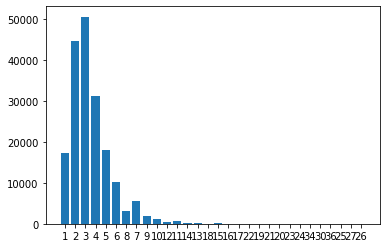

In [28]:
import matplotlib.pyplot as plt

names = list(seq_sizes.keys())
values = list(seq_sizes.values())

plt.bar(range(len(seq_sizes)), values, tick_label=names)
plt.show()

In [29]:
#isso seria pra plotear todos os elementos do dict
sorted_names = list(sorted_d.keys())
sorted_values = list(sorted_d.values())
sorted_len_each_seq = []

for s in seq_to_plot:
#     print(len(s), s)
    sorted_len_each_seq.append(len(s))

df_plot = pd.DataFrame(list(zip(sorted_names, sorted_values, sorted_len_each_seq)),columns =['Name', 'values', 'seq_len'])

df_plot.drop(0, axis=0, inplace=True)
df_plot.head(10)

print('sequence sizes in different ranges of sequence count:')
print('number of sequences with more than 1000 counts and their length: ')
print(df_plot['seq_len'].loc[df_plot['values'] > 1000].value_counts())
print('number of sequences between 500 and 1000 counts and their length: ')
print(df_plot['seq_len'].loc[(df_plot['values'] > 500) & (df_plot['values'] < 1000)].value_counts())
print('number of sequences with less than 500 counts and their length: ')
print(df_plot['seq_len'].loc[df_plot['values'] < 500].value_counts())


sequence sizes in different ranges of sequence count:
number of sequences with more than 1000 counts and their length: 
2    9
3    6
Name: seq_len, dtype: int64
number of sequences between 500 and 1000 counts and their length: 
2    16
3     8
4     1
Name: seq_len, dtype: int64
number of sequences with less than 500 counts and their length: 
5     5674
6     5147
4     3964
7     3609
8     2391
9     1500
3     1300
10     908
11     512
12     351
13     232
2      171
14     116
15      83
16      58
17      27
18      20
19      17
20      14
21      10
23       7
22       5
24       2
27       2
34       1
30       1
36       1
25       1
26       1
47       1
Name: seq_len, dtype: int64


47
2
mean len: 6.3164794007490634


array([[<AxesSubplot:title={'center':'seq_len'}>]], dtype=object)

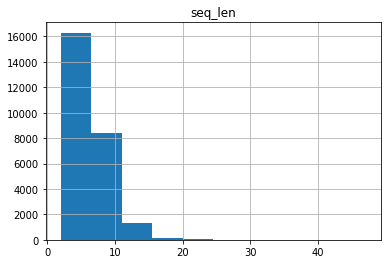

In [30]:
print(df_plot['seq_len'].max())
print(df_plot['seq_len'].min())
print('mean len: '+ str(df_plot['seq_len'].mean()))
df_plot.hist('seq_len')

# Random baseline

### Uniform Random splitting with sublists varying from size 1 to 5

In [77]:
#split into random size chunks 
from itertools import islice
from random import randint

#https://stackoverflow.com/questions/21439011/best-way-to-split-a-list-into-randomly-sized-chunks
def random_chunk(lista, min_chunk=1, max_chunk=5): 
    it = iter(lista) #The iter() function creates an object which can be iterated one element at a time. These objects are useful when coupled with loops like for loop, while loop.
    while True:
        nxt = list(islice(it,randint(min_chunk,max_chunk))) # islice(iterable, start, stop, step), randint(lower_bound, higher_boundary)
        if nxt:
            yield nxt
        else:
            break            

In [210]:
# create random_baseline
random_baseline = []
for dialog in unigram:
    random_baseline.append(list(random_chunk(dialog[2:-2])))
    
#sanity check
len(random_baseline) == len(unigram)

random_baseline

# create random hidden state
rand_hid_st = random_baseline
for e, i in enumerate(random_baseline):
    for f, j in enumerate(i):
        for g, k in enumerate(j):
            if g == 0:
                rand_hid_st[e][f][g] = 'New'
            else:
                rand_hid_st[e][f][g] = 'Current'
# rand_hid_st

True

### probability of splitting centered in 0.3

In [104]:
## calculate location of split for each dialog:

# import random     

# indexes = []
# for ind in range(len(lista)):
#     coin = random.uniform(0, 1)  #every time toss coin for rand number between 0 and 1
#     if coin <= 0.3:
#         indexes.append(ind)

# indexes

In [169]:
# create split with prob 0.3

import random 
from more_itertools import locate

all_da_seq_rand = []
count_rand = 0

for e, dialog in enumerate(unigram):
    dialog = dialog[2:-2]
    indexes = []
    for ind in range(len(dialog)):
        coin = random.uniform(0, 1)  #every time toss coin for rand number between 0 and 1
        if coin <= 0.3:
            indexes.append(ind)
    split_da_lab_rand = [dialog[i : j] for i, j in zip([0] +  indexes, indexes + [None])]
    all_da_seq_rand.append(split_da_lab_rand)

all_da_seq_rand

#create hidden state comparison for probability split
prob03_hmm = all_da_seq_rand
for e, i in enumerate(all_da_seq_rand):
    for f, j in enumerate(i):
        for g, k in enumerate(j):
            if g == 0:
                prob03_hmm[e][f][g] = 'New'
            else:
                prob03_hmm[e][f][g] = 'Current'
# prob03_hmm